<a href="https://colab.research.google.com/github/youssefbourais0310/Neural_Networks/blob/main/testing_full_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/project_stage/csv.csv")
df

,id,breed
0,f601766d-adb7-4aee-b8e9-c1693667d3f8,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
1,7f87540d-092f-4d1e-933b-10ac5bacbfac,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
2,cad9ae7b-2918-438a-a2fb-bd6abd5eb69f,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
3,9f70c3e7-1370-47c2-aa75-6c7378bccc63,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
4,52ba896b-bbd1-4456-b281-4e6d578c0c12,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
...,...,...
22589,960b6c77-c800-43fb-818d-330577bef239,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22590,97c4cad8-4ed2-446a-9c9b-9ce3656ab6d1,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22591,c036fd80-99e5-47d6-a805-0a017cbeb199,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22592,05eee851-dda2-4807-adec-9c32e4d1292f,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...


In [3]:
# checkout the lables of our data
labels_csv = df

In [4]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels) #does same thing as above
labels

array(['Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       ...,
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Monstera_deliciosa',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Monstera_deliciosa',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Monstera_deliciosa'],
      dtype=object)

In [5]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

85

In [6]:
unique_breeds[:10]

array(['Plantae_Tracheophyta_Cycadopsida_Cycadales_Zamiaceae_Zamia_integrifolia',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Alocasia_odora',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Epipremnum_aureum',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Monstera_deliciosa',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Syngonium_podophyllum',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Zantedeschia_aethiopica',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Chamaerops_humilis',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_filifera',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_robusta',
       'Plantae_Tracheophyta_Liliopsida_Asparagales_Amaryllidaceae_Hymenocallis_littoralis'],
      dtype=object)

In [7]:
# load test image filenames
test_path = "/content/drive/MyDrive/project_stage/1/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/project_stage/1/a6422159-32e2-426a-bc43-d042c17fbd8b.jpg',
 '/content/drive/MyDrive/project_stage/1/a3b2cc05-8803-427d-a612-1c1830b0b64f.jpg',
 '/content/drive/MyDrive/project_stage/1/b765edc8-a6b5-432d-8548-2ce2b660ccc4.jpg',
 '/content/drive/MyDrive/project_stage/1/4000db02-1304-4f43-83cd-c47d4ae07ec0.jpg',
 '/content/drive/MyDrive/project_stage/1/dfaa9c20-4859-406d-9e52-037445faa5e7.jpg',
 '/content/drive/MyDrive/project_stage/1/f8a84d79-d094-4083-9420-203f10869bf9.jpg',
 '/content/drive/MyDrive/project_stage/1/b40b027d-70f9-45b9-98a2-5c5c767eaa13.jpg',
 '/content/drive/MyDrive/project_stage/1/a8ac8b4f-18bd-471f-93d4-3b61a366359d.jpg',
 '/content/drive/MyDrive/project_stage/1/397eefa1-2f65-472d-905b-27f2a1cf8814.jpg',
 '/content/drive/MyDrive/project_stage/1/50203192-e9a1-4639-bec5-206f52e858ff.jpg']

In [8]:
len(test_filenames)

850

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [10]:
# Define image size
IMG_SIZE = 224

#creat a funtion for preprocessing images

def process_image(image_path,img_size=IMG_SIZE) :
  """ 
  takes an image file path and turns the image into tensors.
  """
  # read in an image file 
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensors with 3 colour channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size =[IMG_SIZE,IMG_SIZE])

  return image

In [11]:
# creat a simple function to return a tuple (image , label)
def get_image_label(image_path,label) : 

   """
   take an image file path name and assosciatd label,
   processes the image and return a typle of (image, label).
   """
   image = process_image(image_path)
   return image, label 

In [12]:
# define the batche size , 32 is a good start
BATCH_SIZE = 32

#creat a function to turn data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False) :
  """
  create batches of data out of image (X) and label (y) pairs .
  shuffles the data if its training data but doesnt shuffle if its validation data.
  also accepts test data as input (no labels).
  """

  # if the data is a dataset , we probably dont have labels
  if test_data :
    print("creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset , we dont need to shuffle it 
  elif valid_data :
    print("creating validation data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # only filepaths (no labels)
                                               tf.constant(y)))# labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)   
    return data_batch   

  else :
    print("creating training data batches ....")
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))    

    # shuffling pathnames and labels before mapping image processor function is faster than shuffling images                        
    data = data.shuffle(buffer_size=len(X))

    # creat (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # turn the trining data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [13]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

creating test data batches ...


In [14]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [15]:
# Create a function to load a trained model
def load_model(model_path) :
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from : {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [16]:
# load the full model 
loaded_full_model = load_model("/content/drive/MyDrive/project_stage/model/20220516-15101652713823-plant-model-mobil-net-v2.h5")

Loading saved model from : /content/drive/MyDrive/project_stage/model/20220516-15101652713823-plant-model-mobil-net-v2.h5


In [17]:
#make prdictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1)

27/27 [==============================] - 87s 3s/step


In [18]:
test_predictions

array([[1.0130899e-06, 2.2142085e-13, 1.8643064e-08, ..., 1.0838855e-05,
        2.8394384e-08, 2.7109480e-05],
       [1.8657358e-22, 3.1100895e-18, 2.4123140e-15, ..., 4.1806370e-15,
        5.6059850e-19, 2.3199794e-15],
       [8.4381409e-09, 3.1338560e-13, 5.9672267e-17, ..., 3.5510064e-11,
        8.1065189e-11, 2.8131405e-04],
       ...,
       [3.7530711e-11, 2.4372873e-08, 7.2979404e-08, ..., 7.4513814e-06,
        1.1059118e-10, 2.2241904e-10],
       [1.9215624e-15, 1.6488743e-06, 6.2094047e-14, ..., 3.7041584e-10,
        1.3236422e-08, 2.8726093e-12],
       [9.8715837e-24, 3.9366570e-12, 2.2497429e-14, ..., 4.1378140e-11,
        8.6336270e-25, 3.6541110e-14]], dtype=float32)

In [446]:
# first predction 
index = 402
# print(test_predictions[index])
print(test_filenames[index])
print(f"Max value (probability of prediction): { np.max(test_predictions[index])}")
print(f"Sum:{np.sum(test_predictions[index])}")
print(f"Max index : {np.argmax(test_predictions[index])}")
print(f"Predicted label:{unique_breeds[np.argmax(test_predictions[index])]}")

/content/drive/MyDrive/project_stage/1/eed3a5d3-6f2a-400f-9e28-261a3df795b0.jpg
Max value (probability of prediction): 0.9355095028877258
Sum:0.9999999403953552
Max index : 52
Predicted label:Plantae_Tracheophyta_Magnoliopsida_Lamiales_Bignoniaceae_Jacaranda_mimosifolia


In [462]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/project_stage/test_labels.csv")
dfdf = df.iloc[: , 1:]

In [465]:
dfdf

,id,breed
0,83bcef3e-2881-4ab5-bf26-ec10a4e00419.jpg,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
1,8df87285-664f-47f0-bcc6-edca3187ea9e.jpg,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
2,c9f3daaf-4ffd-4b99-b3d0-bdb554a0d124.jpg,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
3,dd4a86a4-4683-4e13-b89a-a365434d536e.jpg,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
4,ffff454f-5d39-4132-9a45-d39fd9c16cd2.jpg,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
...,...,...
845,784fab5c-0d04-44a6-9274-e5871048b39d.jpg,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
846,0c7b610f-6c49-4c31-9005-c26b7ab8775e.jpg,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
847,4a6acc67-8bb5-4e2c-af67-a89b5c584d7d.jpg,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
848,a6422159-32e2-426a-bc43-d042c17fbd8b.jpg,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...


In [494]:
dfdf['id'] = dfdf['id'].str.replace('.jpg','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [497]:
dfdf

,id,breed
0,83bcef3e-2881-4ab5-bf26-ec10a4e00419,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
1,8df87285-664f-47f0-bcc6-edca3187ea9e,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
2,c9f3daaf-4ffd-4b99-b3d0-bdb554a0d124,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
3,dd4a86a4-4683-4e13-b89a-a365434d536e,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
4,ffff454f-5d39-4132-9a45-d39fd9c16cd2,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
...,...,...
845,784fab5c-0d04-44a6-9274-e5871048b39d,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
846,0c7b610f-6c49-4c31-9005-c26b7ab8775e,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
847,4a6acc67-8bb5-4e2c-af67-a89b5c584d7d,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
848,a6422159-32e2-426a-bc43-d042c17fbd8b,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...


In [498]:
labels_test = dfdf

In [505]:
filepaths = ["/content/drive/MyDrive/project_stage/1/" + fpath + ".jpg" for fpath in labels_test["id"]]


In [506]:
filepaths[:10]

['/content/drive/MyDrive/project_stage/1/83bcef3e-2881-4ab5-bf26-ec10a4e00419.jpg',
 '/content/drive/MyDrive/project_stage/1/8df87285-664f-47f0-bcc6-edca3187ea9e.jpg',
 '/content/drive/MyDrive/project_stage/1/c9f3daaf-4ffd-4b99-b3d0-bdb554a0d124.jpg',
 '/content/drive/MyDrive/project_stage/1/dd4a86a4-4683-4e13-b89a-a365434d536e.jpg',
 '/content/drive/MyDrive/project_stage/1/ffff454f-5d39-4132-9a45-d39fd9c16cd2.jpg',
 '/content/drive/MyDrive/project_stage/1/b211e1a2-202b-404d-b4b5-92ca033e0ee3.jpg',
 '/content/drive/MyDrive/project_stage/1/e3f4784c-25f4-4e4d-b708-08f3f1b889bc.jpg',
 '/content/drive/MyDrive/project_stage/1/7ce273cd-971c-470d-a449-5a3e1321682f.jpg',
 '/content/drive/MyDrive/project_stage/1/4631a31b-71d8-4bd2-8dea-f7676ee9ed37.jpg',
 '/content/drive/MyDrive/project_stage/1/1f37a821-a907-463a-aaab-c2bdb4a4763a.jpg']

In [507]:
# check whether of filenames matches number of actual image files 
import os 
if len(os.listdir("/content/drive/MyDrive/project_stage/1")) == len(filepaths):
  print("filepaths match actual amount of files ! proceed.")
else :
  print ("filepaths do not match actual amount of files , check the target directory.")

filepaths match actual amount of files ! proceed.


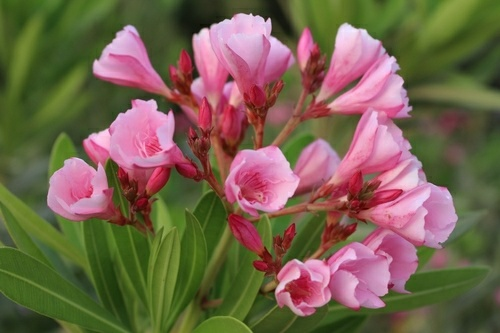

In [508]:
from IPython.display import Image
Image(filepaths[0])

In [510]:
labels_test["breed"][0]

'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander'

In [512]:
import numpy as np
labels = labels_test["breed"].to_numpy()
#labels = np.array(labels) #does same thing as above
labels[:10]

array(['Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander',
       'Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander'],
      dtype=object)

In [513]:
#see if numbers of labels match number of filenames 
if len(labels) == len(filepaths):
  print("number of labels matches number of filenames")
else : 
  print("number of labels does not match of file names , check data directories!")

number of labels matches number of filenames


In [514]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

85

In [515]:
unique_breeds[:10]

array(['Plantae_Tracheophyta_Cycadopsida_Cycadales_Zamiaceae_Zamia_integrifolia',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Alocasia_odora',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Epipremnum_aureum',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Monstera_deliciosa',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Syngonium_podophyllum',
       'Plantae_Tracheophyta_Liliopsida_Alismatales_Araceae_Zantedeschia_aethiopica',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Chamaerops_humilis',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_filifera',
       'Plantae_Tracheophyta_Liliopsida_Arecales_Arecaceae_Washingtonia_robusta',
       'Plantae_Tracheophyta_Liliopsida_Asparagales_Amaryllidaceae_Hymenocallis_littoralis'],
      dtype=object)

In [516]:
# Turn a single label into a booleans
print(labels[0])
labels[0] == unique_breeds

Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [517]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, Fal

In [518]:
from numpy.ma.extras import unique
#exemple : turning boolean array into integers 
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample occurs

Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander
(array([42]),)
42
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [519]:
print(labels[2])
print(boolean_labels[2].astype(int))

Plantae_Tracheophyta_Magnoliopsida_Gentianales_Apocynaceae_Nerium_oleander
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [520]:
filepaths[:2]

['/content/drive/MyDrive/project_stage/1/83bcef3e-2881-4ab5-bf26-ec10a4e00419.jpg',
 '/content/drive/MyDrive/project_stage/1/8df87285-664f-47f0-bcc6-edca3187ea9e.jpg']

In [521]:
#setup x & y variable 
X = filepaths
y = boolean_labels

In [532]:
# lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into ytaining and validation of total size NUM_IMAGES
X_train,X_test,y_train,y_test = train_test_split(X,
                                               y,
                                               test_size=849,
                                               random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(1, 1, 849, 849)

In [533]:
TEST_data = create_data_batches(X_test, y_test, valid_data = True)

creating validation data batches ...


In [534]:
# Evaluate the loaded model
loaded_full_model.evaluate(TEST_data)

27/27 [==============================] - 34s 1s/step - loss: 2.8610 - accuracy: 0.6042


[2.861015558242798, 0.6042402982711792]